In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

In [3]:
train_data = pd.read_csv("train_values.csv")
train_labels=pd.read_csv("train_labels.csv")
test_data = pd.read_csv("test_values.csv")



In [11]:
print(train_data.columns)
for i in ['row_id', 'loan_type', 'property_type', 'loan_purpose', 'occupancy',
       'loan_amount', 'preapproval', 'msa_md', 'state_code', 'county_code',
       'applicant_ethnicity', 'applicant_race', 'applicant_sex',
       'applicant_income', 'population', 'minority_population_pct',
       'ffiecmedian_family_income', 'tract_to_msa_md_income_pct',
       'number_of_owner-occupied_units', 'number_of_1_to_4_family_units',
       'lender', 'co_applicant']:
    print(test_data[test_data[i].isnull()==True])

Index(['row_id', 'loan_type', 'property_type', 'loan_purpose', 'occupancy',
       'loan_amount', 'preapproval', 'msa_md', 'state_code', 'county_code',
       'applicant_ethnicity', 'applicant_race', 'applicant_sex',
       'applicant_income', 'population', 'minority_population_pct',
       'ffiecmedian_family_income', 'tract_to_msa_md_income_pct',
       'number_of_owner-occupied_units', 'number_of_1_to_4_family_units',
       'lender', 'co_applicant'],
      dtype='object')
Empty DataFrame
Columns: [row_id, loan_type, property_type, loan_purpose, occupancy, loan_amount, preapproval, msa_md, state_code, county_code, applicant_ethnicity, applicant_race, applicant_sex, applicant_income, population, minority_population_pct, ffiecmedian_family_income, tract_to_msa_md_income_pct, number_of_owner-occupied_units, number_of_1_to_4_family_units, lender, co_applicant]
Index: []

[0 rows x 22 columns]
Empty DataFrame
Columns: [row_id, loan_type, property_type, loan_purpose, occupancy, loan_amoun

        row_id  loan_type  property_type  loan_purpose  occupancy  \
2            2          1              1             1          1   
6            6          1              1             1          1   
20          20          2              1             1          1   
58          58          1              1             1          1   
142        142          3              1             1          1   
146        146          2              1             1          1   
159        159          1              1             1          1   
208        208          1              1             1          1   
231        231          1              1             1          1   
302        302          1              1             3          1   
306        306          1              1             1          1   
321        321          3              1             1          1   
340        340          2              1             1          1   
349        349          3         

In [3]:
train_data.describe()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,...,500000.000000,500000.000000,460052.000000,477535.000000,477534.000000,477560.000000,477486.000000,477435.000000,477470.000000,500000.000000
mean,249999.500000,1.366276,1.047650,2.066810,1.109590,221.753158,2.764722,181.606972,23.726924,144.542062,...,4.786586,1.462374,102.389521,5416.833956,31.617310,69235.603298,91.832624,1427.718282,1886.147065,3720.121344
std,144337.711634,0.690555,0.231404,0.948371,0.326092,590.641648,0.543061,138.464169,15.982768,100.243612,...,1.024927,0.677685,153.534496,2728.144999,26.333938,14810.058791,14.210924,737.559511,914.123744,1838.313175
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,1.000000,14.000000,0.534000,17858.000000,3.981000,4.000000,1.000000,0.000000
25%,124999.750000,1.000000,1.000000,1.000000,1.000000,93.000000,3.000000,25.000000,6.000000,57.000000,...,5.000000,1.000000,47.000000,3744.000000,10.700000,59731.000000,88.067250,944.000000,1301.000000,2442.000000
50%,249999.500000,1.000000,1.000000,2.000000,1.000000,162.000000,3.000000,192.000000,26.000000,131.000000,...,5.000000,1.000000,74.000000,4975.000000,22.901000,67526.000000,100.000000,1327.000000,1753.000000,3731.000000
75%,374999.250000,2.000000,1.000000,3.000000,1.000000,266.000000,3.000000,314.000000,37.000000,246.000000,...,5.000000,2.000000,117.000000,6467.000000,46.020000,75351.000000,100.000000,1780.000000,2309.000000,5436.000000
max,499999.000000,4.000000,3.000000,3.000000,3.000000,100878.000000,3.000000,408.000000,52.000000,324.000000,...,7.000000,4.000000,10139.000000,37097.000000,100.000000,125248.000000,100.000000,8771.000000,13623.000000,6508.000000


In [4]:
train_data.set_index('row_id')
test_data.set_index('row_id')


,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,...,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant
row_id,,,,,,,,,,,,,,,,,,,,,
0,2,1,3,1,115.0,3,101,16,276,2,...,1,NaN,6329.0,59.536,69889.0,85.780,1874.0,2410.0,3791,True
1,1,1,1,1,252.0,2,87,20,68,2,...,1,107.0,2473.0,8.050,65313.0,100.000,947.0,1214.0,2839,True
2,1,1,1,1,270.0,1,-1,-1,-1,2,...,2,119.0,NaN,NaN,NaN,NaN,NaN,NaN,4701,False
3,2,1,1,1,179.0,2,376,20,11,2,...,2,44.0,4795.0,29.676,57766.0,100.000,1426.0,1765.0,2153,True
4,2,1,1,1,36.0,2,254,48,156,3,...,3,32.0,5246.0,5.110,63332.0,100.000,1452.0,2092.0,5710,False
5,1,1,3,1,65.0,3,8,15,131,2,...,2,60.0,4502.0,9.626,61214.0,100.000,1487.0,1764.0,5513,True
6,1,1,1,1,402.0,2,-1,28,-1,2,...,1,120.0,NaN,NaN,NaN,NaN,NaN,NaN,3560,True
7,1,1,3,1,200.0,3,275,48,123,3,...,3,35.0,5256.0,23.770,97181.0,100.000,1685.0,1760.0,763,False
8,1,1,1,2,121.0,3,350,38,233,2,...,1,309.0,3231.0,21.712,85665.0,83.509,966.0,1282.0,5498,False


In [5]:
train_data=train_data.join(train_labels.set_index("row_id"),on="row_id")

In [6]:
msa_md = pd.crosstab(index=train_data["msa_md"], columns=train_data["accepted"])
state_code = pd.crosstab(index=train_data["state_code"], columns=train_data["accepted"])
lender = pd.crosstab(index=train_data["lender"], columns=train_data["accepted"])

In [7]:
msa_md_accept_rate=round(msa_md[1]/(msa_md[1]+msa_md[0]),2)
state_accept_rate=round(state_code[1]/(state_code[1]+state_code[0]),2)
lender_accept_rate=round(lender[1]/(lender[1]+lender[0]),2)

In [8]:
lender_accept_rate = pd.DataFrame({'lender':lender_accept_rate.index, 'lender_accept_prob':lender_accept_rate.values})
msa_md_accept_rate = pd.DataFrame({'msa_md':msa_md_accept_rate.index, 'msa_accept_prob':msa_md_accept_rate.values})
state_accept_rate=pd.DataFrame({"state_code":state_accept_rate.index, 'state_accept_prob':state_accept_rate.values})

In [9]:
print(msa_md_accept_rate.head(100))


    msa_md  msa_accept_prob
0       -1             0.34
1        0             0.57
2        1             0.48
3        2             0.60
4        3             0.39
5        4             0.62
6        5             0.68
7        6             0.58
8        7             0.43
9        8             0.64
10       9             0.52
11      10             0.51
12      11             0.57
13      12             0.53
14      13             0.57
15      14             0.68
16      15             0.61
17      16             0.51
18      17             0.48
19      18             0.51
20      19             0.64
21      20             0.58
22      21             0.47
23      22             0.58
24      23             0.63
25      24             0.52
26      25             0.54
27      26             0.58
28      27             0.61
29      28             0.51
..     ...              ...
70      69             0.42
71      70             0.43
72      71             0.53
73      72          

In [10]:
#msa_md_accept_rate.set_index('msa_md')
train_data=pd.merge(train_data,msa_md_accept_rate,on="msa_md")
train_data=pd.merge(train_data,state_accept_rate,on="state_code")
train_data=pd.merge(train_data,lender_accept_rate,on="lender")



In [10]:
train_data.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted,msa_accept_prob,state_accept_prob,lender_accept_prob
0,0,3,1,1,1,70.0,3,18,37,246,...,60588.0,50.933,716.0,2642.0,4536,False,1,0.51,0.54,0.84
1,14667,2,1,1,1,216.0,3,18,37,56,...,59851.0,100.000,1431.0,3526.0,4536,True,1,0.51,0.54,0.84
2,23824,1,1,3,1,595.0,3,18,37,56,...,58719.0,54.388,924.0,1731.0,4536,True,0,0.51,0.54,0.84
3,40634,1,1,1,2,126.0,3,18,37,56,...,58995.0,100.000,1499.0,2660.0,4536,False,1,0.51,0.54,0.84
4,42003,1,1,1,2,252.0,3,18,37,56,...,58696.0,93.329,859.0,2046.0,4536,True,1,0.51,0.54,0.84


In [11]:
train_data['minority']=train_data['minority_population_pct']/100*train_data['population']
test_data['minority']=test_data['minority_population_pct']/100*test_data['population']
train_data['tract_family_income']=train_data['tract_to_msa_md_income_pct']/100*train_data['ffiecmedian_family_income']
test_data['tract_family_income']=test_data['tract_to_msa_md_income_pct']/100*test_data['ffiecmedian_family_income']




In [12]:
total_columns=['loan_type', 'property_type', 'loan_purpose', 'occupancy','loan_amount', 'preapproval', 'msa_md', 'state_code', 'county_code',
       'applicant_ethnicity', 'applicant_race', 'applicant_sex','applicant_income', 'minority',
       'ffiecmedian_family_income', 'tract_to_msa_md_income_pct',
       'number_of_owner-occupied_units', 'number_of_1_to_4_family_units',
       'lender', 'co_applicant']
continuos_columns=['loan_amount','applicant_income','population', 'minority_population_pct',
       'ffiecmedian_family_income', 'tract_to_msa_md_income_pct',
       'number_of_owner-occupied_units', 'number_of_1_to_4_family_units']
categorical_columns=['loan_type', 'property_type', 'loan_purpose', 'occupancy','preapproval', 'msa_md', 'state_code', 'county_code','applicant_ethnicity', 'applicant_race', 'applicant_sex','co_applicant', 'lender']
accepted_train=train_data[train_data['accepted']==1]
unaccepted_train=train_data[train_data['accepted']==0]

loan_amount


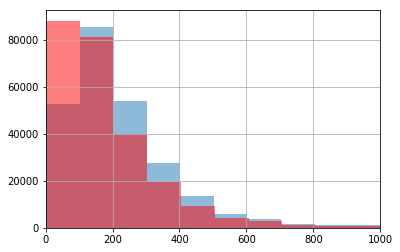

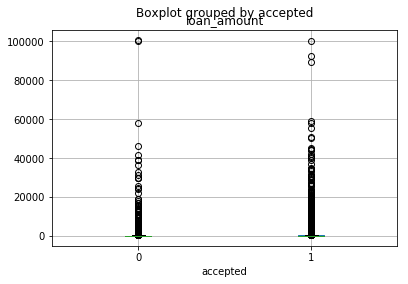

mean: 249.1286053559577 // 194.35273284617784
max: 100333.0 // 100878.0
min: 1.0 // 1.0
median: 184.0 // 141.0


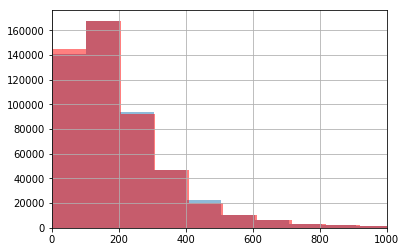

In [18]:
print( 'loan_amount')
accepted_train[  'loan_amount'].hist(bins=1000, alpha=0.5)
unaccepted_train[  'loan_amount'].hist(bins=1000,color='red', alpha=0.5)

plt.xlim((0,1000))
plt.show()

train_data.boxplot(column= 'loan_amount', by='accepted')

plt.show()
print("mean:",accepted_train[  'loan_amount'].mean(),'//',unaccepted_train[ 'loan_amount'].mean())
print("max:",accepted_train[  'loan_amount'].max(),'//',unaccepted_train[  'loan_amount'].max())
print("min:",accepted_train[  'loan_amount'].min(),'//',unaccepted_train[  'loan_amount'].min())
print("median:",accepted_train[  'loan_amount'].median(),'//',unaccepted_train[  'loan_amount'].median())

train_data[  'loan_amount'].hist(bins=1000, alpha=0.5)
test_data[  'loan_amount'].hist(bins=1000,color='red', alpha=0.5)
plt.xlim((0,1000))
plt.show()



applicant_income


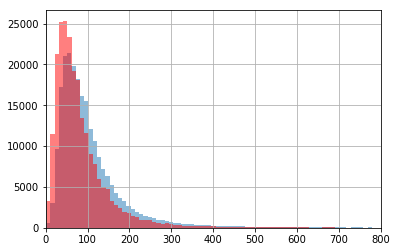

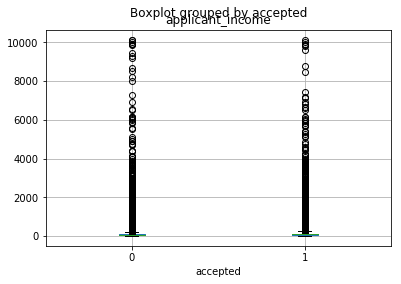

mean: 113.91619164930397 // 90.97127811936153
max: 10109.0 // 10139.0
min: 1.0 // 1.0
median: 83.0 // 64.0


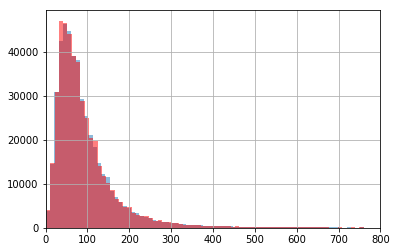

In [19]:
print( 'applicant_income')
accepted_train[ 'applicant_income'].hist(bins=1000, alpha=0.5)
unaccepted_train[  'applicant_income'].hist(bins=1000,color='red', alpha=0.5)

plt.xlim((0,800))
plt.show()

train_data.boxplot(column= 'applicant_income', by='accepted')

plt.show()
print("mean:",accepted_train[ 'applicant_income'].mean(),'//',unaccepted_train[ 'applicant_income'].mean())
print("max:",accepted_train[  'applicant_income'].max(),'//',unaccepted_train[  'applicant_income'].max())
print("min:",accepted_train[  'applicant_income'].min(),'//',unaccepted_train['applicant_income'].min())
print("median:",accepted_train[ 'applicant_income'].median(),'//',unaccepted_train['applicant_income'].median())
train_data[  'applicant_income'].hist(bins=1000, alpha=0.5)
test_data[ 'applicant_income'].hist(bins=1000,color='red', alpha=0.5)
plt.xlim((0,800))
plt.show()

population


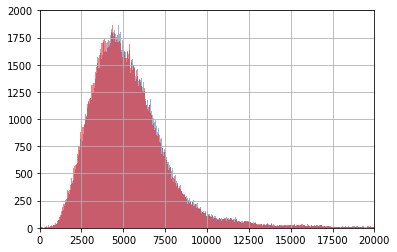

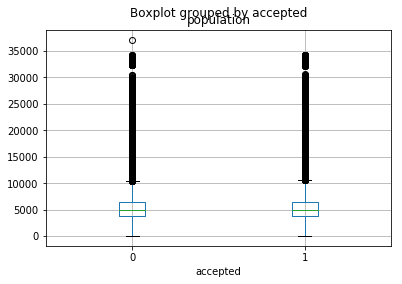

mean: 5466.875374694526 // 5362.21843193245
max: 34176.0 // 37097.0
min: 16.0 // 14.0
median: 5012.0 // 4931.0


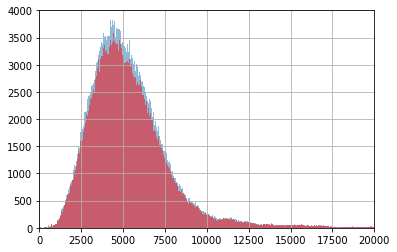

In [20]:
print('population')
accepted_train['population'].hist(bins=1000, alpha=0.5)
unaccepted_train['population'].hist(bins=1000,color='red', alpha=0.5)

plt.xlim((0,20000))
plt.ylim((0,2000))
plt.show()

train_data.boxplot(column= 'population', by='accepted')

plt.show()
print("mean:",accepted_train[ 'population'].mean(),'//',unaccepted_train['population'].mean())
print("max:",accepted_train['population'].max(),'//',unaccepted_train['population'].max())
print("min:",accepted_train['population'].min(),'//',unaccepted_train['population'].min())
print("median:",accepted_train['population'].median(),'//',unaccepted_train['population'].median())

train_data['population'].hist(bins=1000, alpha=0.5)
test_data['population'].hist(bins=1000,color='red', alpha=0.5)
plt.xlim((0,20000))
plt.ylim((0,4000))
plt.show()

minority


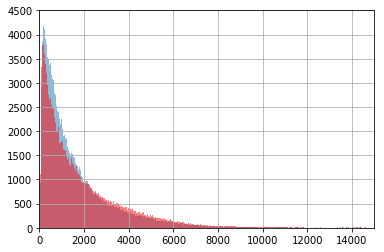

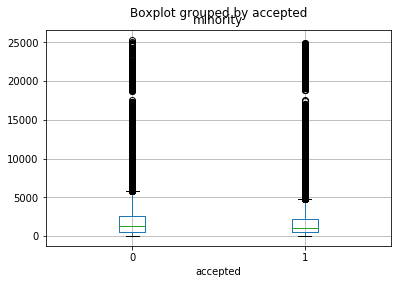

mean: 1666.2867520222123 // 1894.5677945943557
max: 24888.233369999998 // 25349.49978
min: 1.0243799999999998 // 2.9259199999999996
median: 1061.168 // 1226.98845


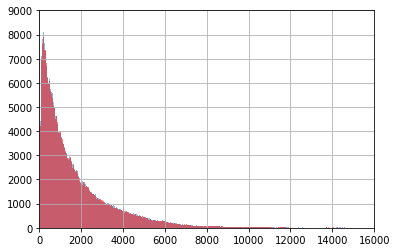

In [21]:
print('minority')
accepted_train['minority'].hist(bins=1000, alpha=0.5)
unaccepted_train['minority'].hist(bins=1000,color='red', alpha=0.5)

plt.xlim((0,15000))
plt.ylim((0,4500))
plt.show()

train_data.boxplot(column='minority', by='accepted')

plt.show()
print("mean:",accepted_train['minority'].mean(),'//',unaccepted_train['minority'].mean())
print("max:",accepted_train['minority'].max(),'//',unaccepted_train['minority'].max())
print("min:",accepted_train['minority'].min(),'//',unaccepted_train['minority'].min())
print("median:",accepted_train['minority'].median(),'//',unaccepted_train['minority'].median())

train_data['minority'].hist(bins=1000, alpha=0.5)
test_data['minority'].hist(bins=1000,color='red', alpha=0.5)
plt.xlim((0,16000))
plt.ylim((0,9000))
plt.show()

minority_population_pct


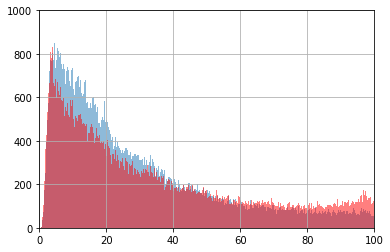

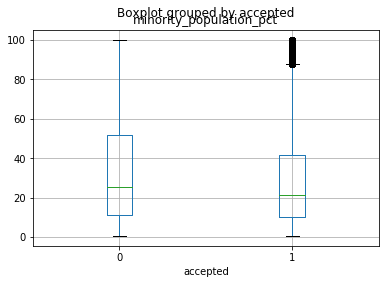

mean: 29.275008049694694 // 34.17370355009384
max: 100.0 // 100.0
min: 0.534 // 0.5379999999999999
median: 21.2045 // 25.221


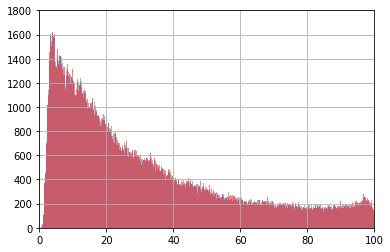

In [22]:
print('minority_population_pct')
accepted_train['minority_population_pct'].hist(bins=1000, alpha=0.5)
unaccepted_train['minority_population_pct'].hist(bins=1000,color='red', alpha=0.5)

plt.xlim((0,100))
plt.ylim((0,1000))
plt.show()

train_data.boxplot(column='minority_population_pct', by='accepted')

plt.show()
print("mean:",accepted_train['minority_population_pct'].mean(),'//',unaccepted_train['minority_population_pct'].mean())
print("max:",accepted_train['minority_population_pct'].max(),'//',unaccepted_train['minority_population_pct'].max())
print("min:",accepted_train['minority_population_pct'].min(),'//',unaccepted_train['minority_population_pct'].min())
print("median:",accepted_train['minority_population_pct'].median(),'//',unaccepted_train['minority_population_pct'].median())


train_data['minority_population_pct'].hist(bins=1000, alpha=0.5)
test_data['minority_population_pct'].hist(bins=1000,color='red', alpha=0.5)
plt.xlim((0,100))
plt.ylim((0,1800))
plt.show()

tract_to_msa_md_income_pct


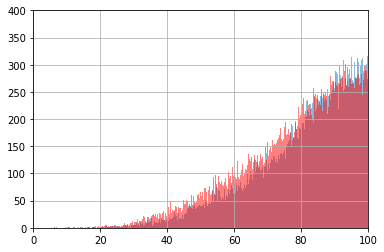

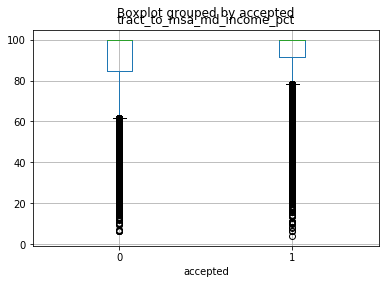

mean: 93.08087172026795 // 90.47022610641785
max: 100.0 // 100.0
min: 3.9810000000000003 // 6.234
median: 100.0 // 100.0


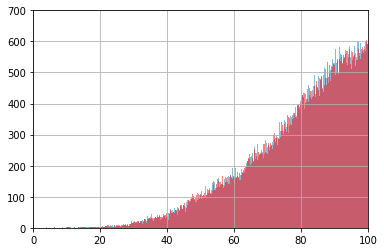

In [23]:
print('tract_to_msa_md_income_pct')
accepted_train['tract_to_msa_md_income_pct'].hist(bins=1000, alpha=0.5)
unaccepted_train['tract_to_msa_md_income_pct'].hist(bins=1000,color='red', alpha=0.5)

plt.xlim((0,100))
plt.ylim((0,400))
plt.show()

train_data.boxplot(column='tract_to_msa_md_income_pct', by='accepted')

plt.show()
print("mean:",accepted_train['tract_to_msa_md_income_pct'].mean(),'//',unaccepted_train['tract_to_msa_md_income_pct'].mean())
print("max:",accepted_train['tract_to_msa_md_income_pct'].max(),'//',unaccepted_train['tract_to_msa_md_income_pct'].max())
print("min:",accepted_train['tract_to_msa_md_income_pct'].min(),'//',unaccepted_train['tract_to_msa_md_income_pct'].min())
print("median:",accepted_train['tract_to_msa_md_income_pct'].median(),'//',unaccepted_train['tract_to_msa_md_income_pct'].median())

train_data['tract_to_msa_md_income_pct'].hist(bins=1000, alpha=0.5)
test_data['tract_to_msa_md_income_pct'].hist(bins=1000,color='red', alpha=0.5)
plt.xlim((0,100))
plt.ylim((0,700))
plt.show()

ffiecmedian_family_income


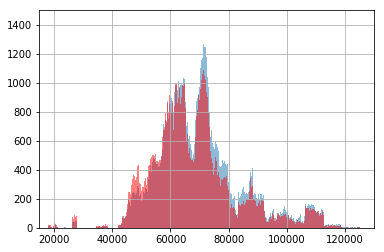

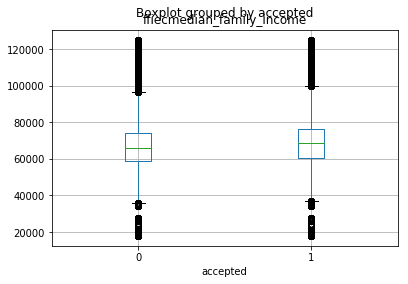

mean: 70184.26590374693 // 68200.20990882098
max: 125248.0 // 125172.0
min: 17858.0 // 17862.0
median: 68843.0 // 65968.0


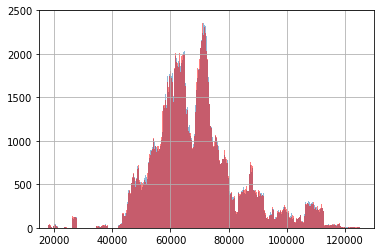

In [24]:
print('ffiecmedian_family_income')
accepted_train['ffiecmedian_family_income'].hist(bins=1000, alpha=0.5)
unaccepted_train['ffiecmedian_family_income'].hist(bins=1000,color='red', alpha=0.5)

plt.xlim((15000,130000))
plt.ylim((0,1500))
plt.show()

train_data.boxplot(column='ffiecmedian_family_income', by='accepted')

plt.show()
print("mean:",accepted_train['ffiecmedian_family_income'].mean(),'//',unaccepted_train['ffiecmedian_family_income'].mean())
print("max:",accepted_train['ffiecmedian_family_income'].max(),'//',unaccepted_train['ffiecmedian_family_income'].max())
print("min:",accepted_train['ffiecmedian_family_income'].min(),'//',unaccepted_train['ffiecmedian_family_income'].min())
print("median:",accepted_train['ffiecmedian_family_income'].median(),'//',unaccepted_train['ffiecmedian_family_income'].median())

train_data['ffiecmedian_family_income'].hist(bins=1000, alpha=0.5)
test_data['ffiecmedian_family_income'].hist(bins=1000,color='red', alpha=0.5)
plt.xlim((15000,130000))
plt.ylim((0,2500))
plt.show()

tract_family_income


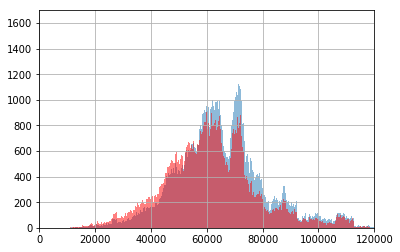

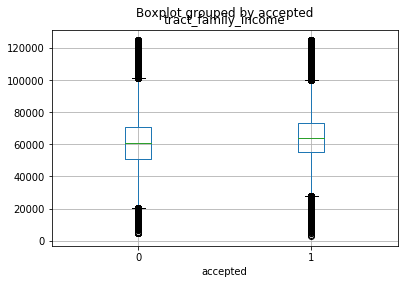

mean: 65226.0817240317 // 61546.97507233526
max: 125248.0 // 125172.0
min: 2930.1354300000003 // 4701.651
median: 64172.0 // 61078.0


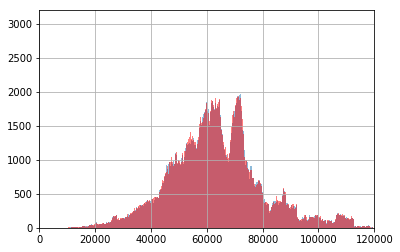

In [25]:
print('tract_family_income')
accepted_train[ 'tract_family_income'].hist(bins=1000, alpha=0.5)
unaccepted_train[ 'tract_family_income'].hist(bins=1000,color='red', alpha=0.5)

plt.xlim((0,120000))
plt.ylim((0,1700))
plt.show()

train_data.boxplot(column='tract_family_income', by='accepted')

plt.show()
print("mean:",accepted_train['tract_family_income'].mean(),'//',unaccepted_train[ 'tract_family_income'].mean())
print("max:",accepted_train['tract_family_income'].max(),'//',unaccepted_train['tract_family_income'].max())
print("min:",accepted_train['tract_family_income'].min(),'//',unaccepted_train['tract_family_income'].min())
print("median:",accepted_train[ 'tract_family_income'].median(),'//',unaccepted_train['tract_family_income'].median())

train_data['tract_family_income'].hist(bins=1000, alpha=0.5)
test_data['tract_family_income'].hist(bins=1000,color='red', alpha=0.5)
plt.xlim((0,120000))
plt.ylim((0,3200))
plt.show()

number_of_owner-occupied_units


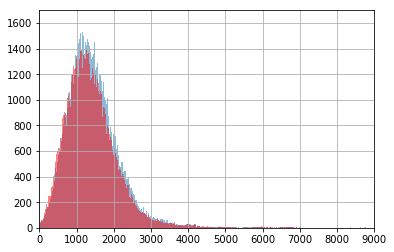

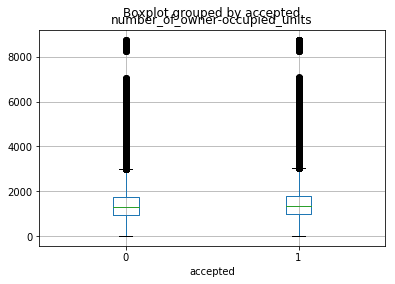

mean: 1453.1532163554928 // 1399.9553600764004
max: 8771.0 // 8761.0
min: 4.0 // 4.0
median: 1350.0 // 1303.0


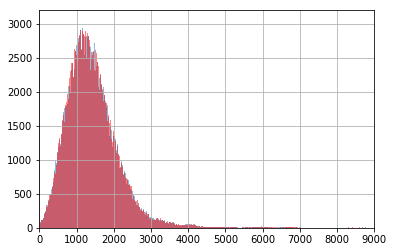

In [26]:
print("number_of_owner-occupied_units")
accepted_train[ 'number_of_owner-occupied_units'].hist(bins=1000, alpha=0.5)
unaccepted_train[ 'number_of_owner-occupied_units'].hist(bins=1000,color='red', alpha=0.5)

plt.xlim((0,9000))
plt.ylim((0,1700))
plt.show()

train_data.boxplot(column='number_of_owner-occupied_units', by='accepted')

plt.show()
print("mean:",accepted_train[ 'number_of_owner-occupied_units'].mean(),'//',unaccepted_train[ 'number_of_owner-occupied_units'].mean())
print("max:",accepted_train[ 'number_of_owner-occupied_units'].max(),'//',unaccepted_train[ 'number_of_owner-occupied_units'].max())
print("min:",accepted_train[ 'number_of_owner-occupied_units'].min(),'//',unaccepted_train[ 'number_of_owner-occupied_units'].min())
print("median:",accepted_train[ 'number_of_owner-occupied_units'].median(),'//',unaccepted_train[ 'number_of_owner-occupied_units'].median())

train_data['number_of_owner-occupied_units'].hist(bins=1000, alpha=0.5)
test_data['number_of_owner-occupied_units'].hist(bins=1000,color='red', alpha=0.5)
plt.xlim((0,9000))
plt.ylim((0,3200))
plt.show()

number_of_1_to_4_family_units


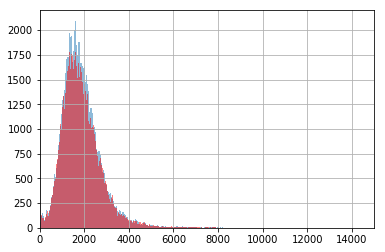

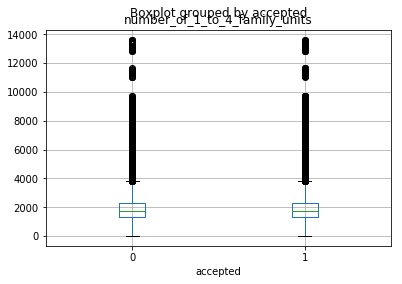

mean: 1891.4209972910605 // 1880.390775093629
max: 13623.0 // 13599.0
min: 1.0 // 1.0
median: 1755.0 // 1751.0


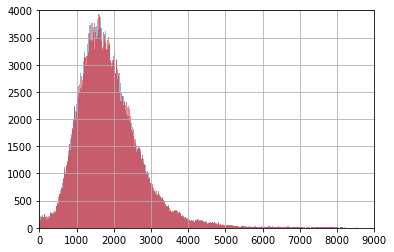

In [27]:
print( 'number_of_1_to_4_family_units')
accepted_train[  'number_of_1_to_4_family_units'].hist(bins=1000, alpha=0.5)
unaccepted_train[  'number_of_1_to_4_family_units'].hist(bins=1000,color='red', alpha=0.5)

plt.xlim((0,15000))
plt.ylim((0,2200))
plt.show()

train_data.boxplot(column= 'number_of_1_to_4_family_units', by='accepted')

plt.show()
print("mean:",accepted_train[  'number_of_1_to_4_family_units'].mean(),'//',unaccepted_train[ 'number_of_1_to_4_family_units'].mean())
print("max:",accepted_train[  'number_of_1_to_4_family_units'].max(),'//',unaccepted_train[  'number_of_1_to_4_family_units'].max())
print("min:",accepted_train[  'number_of_1_to_4_family_units'].min(),'//',unaccepted_train[  'number_of_1_to_4_family_units'].min())
print("median:",accepted_train[  'number_of_1_to_4_family_units'].median(),'//',unaccepted_train[  'number_of_1_to_4_family_units'].median())

train_data['number_of_1_to_4_family_units'].hist(bins=1000, alpha=0.5)
test_data['number_of_1_to_4_family_units'].hist(bins=1000,color='red', alpha=0.5)
plt.xlim((0,9000))
plt.ylim((0,4000))
plt.show()

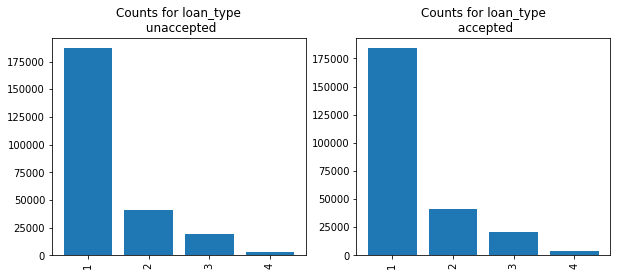

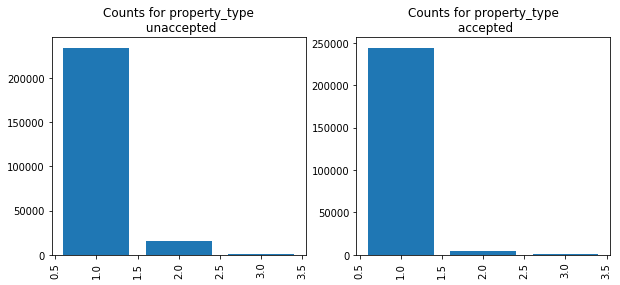

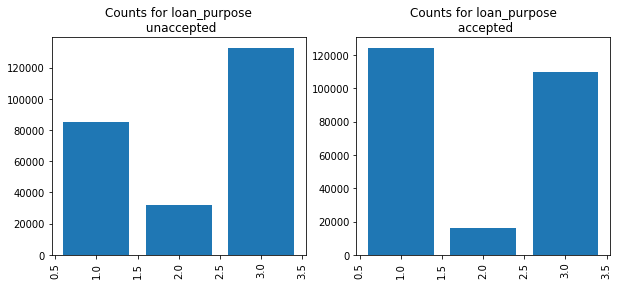

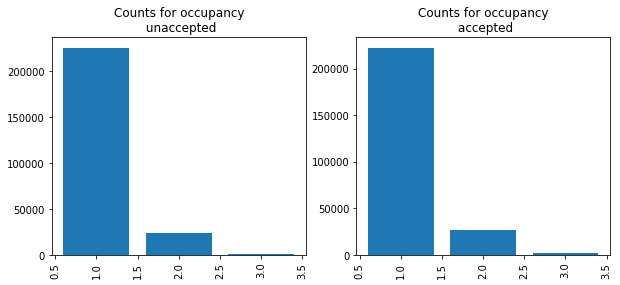

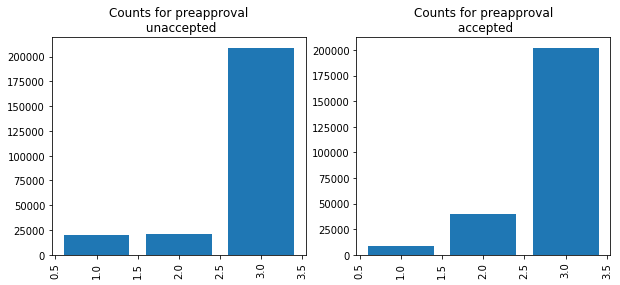

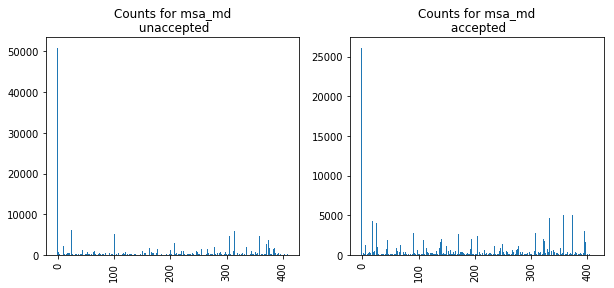

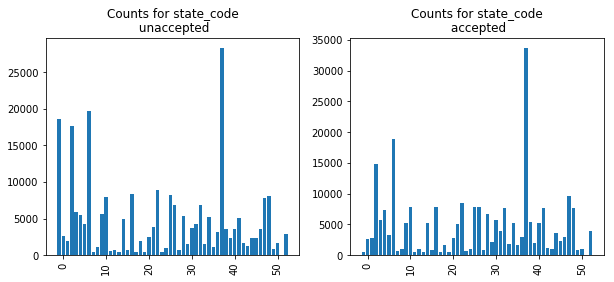

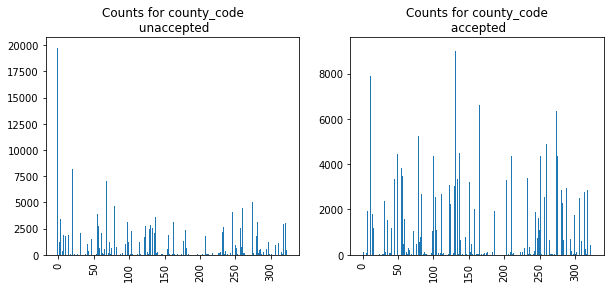

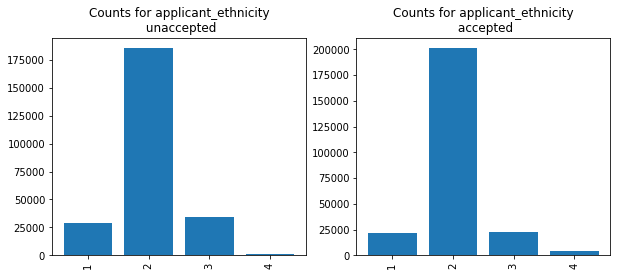

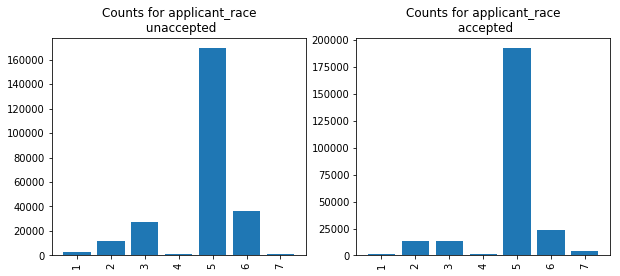

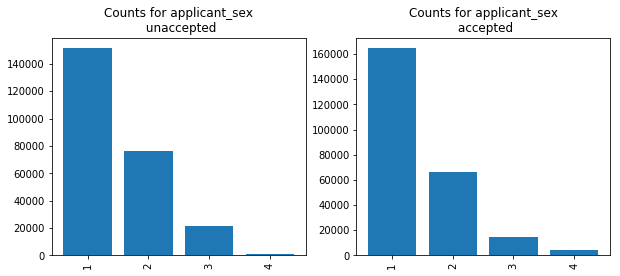

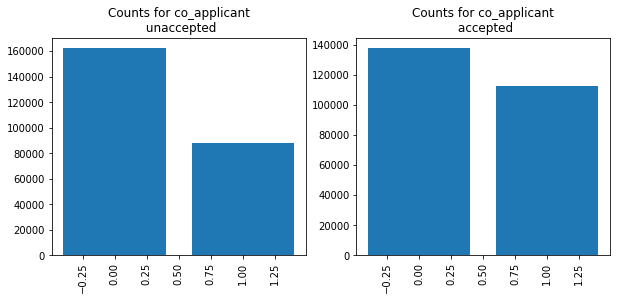

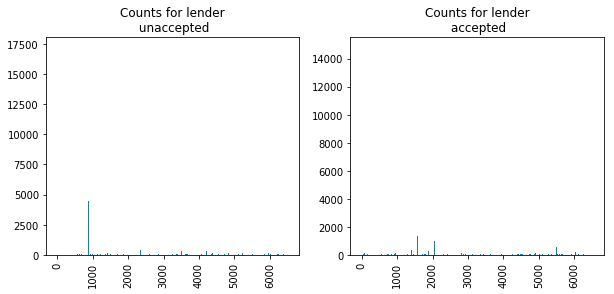

In [13]:
train_combine=train_data
train_combine['dummy'] = np.ones(shape = train_combine.shape[0])
for col in categorical_columns:
    counts = train_combine[['dummy', 'accepted', col]].groupby(['accepted', col], as_index = False).count()
    temp = counts[counts['accepted'] == 0][[col, 'dummy']]
    _ = plt.figure(figsize = (10,4))
    plt.subplot(1, 2, 1)
    temp = counts[counts['accepted'] == 0][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n unaccepted')
    plt.subplot(1, 2, 2)
    temp = counts[counts['accepted'] == 1][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.title('Counts for ' + col + '\n accepted')
    plt.xticks(rotation=90)
    plt.show()


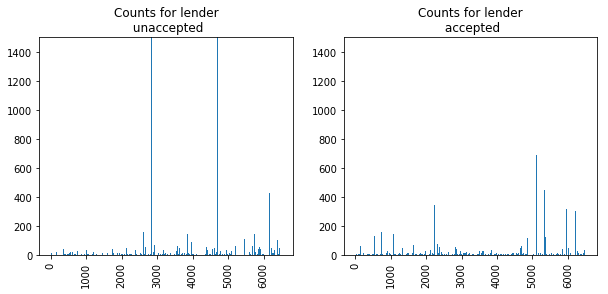

In [16]:
counts = train_combine[['dummy', 'accepted', 'lender']].groupby(['accepted','lender'], as_index = False).count()
temp = counts[counts['accepted'] == 0][['lender', 'dummy']]
_ = plt.figure(figsize = (10,4))
plt.subplot(1, 2, 1)
temp = counts[counts['accepted'] == 0][['lender', 'dummy']]
plt.bar(temp['lender'], temp.dummy)
plt.xticks(rotation=90)
plt.ylim((0,1500))
plt.title('Counts for ' + 'lender' + '\n unaccepted')
plt.subplot(1, 2, 2)
temp = counts[counts['accepted'] == 1][['lender', 'dummy']]
plt.bar(temp['lender'], temp.dummy)
plt.title('Counts for ' + 'lender' + '\n accepted')
plt.xticks(rotation=90)
plt.ylim((0,1500))
plt.show()


In [30]:
for col in  total_columns:
    print('accepted:\n',accepted_train[col].value_counts(dropna=False))
    print('unaccepted:\n',unaccepted_train[col].value_counts(dropna=False)) 
    print('----------------------------')

accepted:
 1    183911
2     41638
3     20513
4      4052
Name: loan_type, dtype: int64
unaccepted:
 1    186916
2     40792
3     19008
4      3170
Name: loan_type, dtype: int64
----------------------------
accepted:
 1    244257
2      4459
3      1398
Name: property_type, dtype: int64
unaccepted:
 1    233960
2     15282
3       644
Name: property_type, dtype: int64
----------------------------
accepted:
 1    124391
3    109901
2     15822
Name: loan_purpose, dtype: int64
unaccepted:
 3    132769
1     84874
2     32243
Name: loan_purpose, dtype: int64
----------------------------
accepted:
 1    222325
2     26371
3      1418
Name: occupancy, dtype: int64
unaccepted:
 1    225069
2     24046
3       771
Name: occupancy, dtype: int64
----------------------------
accepted:
 10.0       1035
101.0       979
5.0         975
129.0       971
125.0       969
122.0       968
148.0       967
149.0       966
127.0       965
147.0       962
100.0       959
102.0       958
152.0       956
123

accepted:
 NaN            912
 2726.00000      3
 4427.00000      3
 3858.00000      3
 4758.00000      3
 3820.00000      3
 4967.00000      3
 4728.00000      3
 248.29146       2
 3740.00000      2
 665.86023       2
 1712.27448      2
 559.23150       2
 2332.19448      2
 1881.14010      2
 5131.78991      2
 578.15744       2
 1059.84000      2
 127.89504       2
 325.12800       2
 343.06755       2
 6373.00000      2
 821.64000       2
 285.95190       2
 1768.71380      2
 1016.89731      2
 385.42262       2
 1486.11020      2
 383.49204       2
 799.49232       2
              ... 
 329.61104       1
 471.34152       1
 1752.28470      1
 1034.90000      1
 4261.79456      1
 515.63086       1
 1016.48631      1
 931.24240       1
 1241.63522      1
 6823.60410      1
 575.54763       1
 1111.48200      1
 1312.73088      1
 1177.86864      1
 3119.97175      1
 1509.10400      1
 1187.63800      1
 1049.09193      1
 459.54400       1
 4011.61779      1
 1635.91680      1
 

accepted:
 NaN         939
 1582.0     174
 1662.0     166
 1669.0     166
 1602.0     166
 1343.0     164
 1628.0     164
 1575.0     164
 1433.0     164
 1631.0     164
 1561.0     163
 1660.0     162
 1519.0     162
 1407.0     162
 1606.0     162
 1795.0     162
 1573.0     161
 1666.0     161
 1620.0     161
 1612.0     161
 1544.0     159
 1748.0     159
 1434.0     159
 1367.0     159
 1839.0     159
 1776.0     158
 1354.0     158
 1618.0     157
 1443.0     157
 1627.0     157
           ... 
 5845.0       1
 13061.0      1
 7044.0       1
 5843.0       1
 9196.0       1
 5665.0       1
 7657.0       1
 6128.0       1
 13564.0      1
 6894.0       1
 5543.0       1
 7461.0       1
 7089.0       1
 5974.0       1
 11081.0      1
 4866.0       1
 5456.0       1
 5859.0       1
 5039.0       1
 5756.0       1
 5764.0       1
 6910.0       1
 7638.0       1
 5688.0       1
 11079.0      1
 13039.0      1
 7903.0       1
 6484.0       1
 6265.0       1
 6796.0       1
Name: number_

In [17]:
for col in  total_columns:
    print(train_data[col].value_counts(dropna=False))
    print('----------------------------')

1    370827
2     82430
3     39521
4      7222
Name: loan_type, dtype: int64
----------------------------
1    478217
2     19741
3      2042
Name: property_type, dtype: int64
----------------------------
3    242670
1    209265
2     48065
Name: loan_purpose, dtype: int64
----------------------------
1    447394
2     50417
3      2189
Name: occupancy, dtype: int64
----------------------------
10.0       4539
5.0        3789
3.0        2719
15.0       2582
20.0       2445
25.0       2416
102.0      2226
100.0      2212
98.0       2197
101.0      2184
99.0       2110
51.0       2067
122.0      2017
127.0      1983
49.0       1975
123.0      1955
103.0      1936
149.0      1933
148.0      1932
117.0      1922
50.0       1916
125.0      1913
131.0      1911
128.0      1907
129.0      1906
147.0      1899
154.0      1879
151.0      1877
146.0      1877
133.0      1864
           ... 
3526.0        1
2548.0        1
2936.0        1
10572.0       1
6924.0        1
1744.0        1
3902.0   

NaN         22530
 1582.0       334
 1428.0       310
 1795.0       306
 1565.0       303
 1561.0       302
 1562.0       302
 1647.0       301
 1610.0       299
 1628.0       298
 1552.0       297
 1341.0       297
 1645.0       296
 1607.0       296
 1573.0       296
 1580.0       296
 1392.0       296
 1649.0       295
 1617.0       294
 1662.0       294
 1636.0       294
 1666.0       294
 1602.0       294
 1620.0       293
 1644.0       293
 1367.0       293
 1631.0       292
 1627.0       292
 1343.0       292
 1704.0       291
            ...  
 5965.0         1
 5959.0         1
 5957.0         1
 6488.0         1
 5953.0         1
 6043.0         1
 5949.0         1
 6438.0         1
 5945.0         1
 7644.0         1
 5935.0         1
 5840.0         1
 7620.0         1
 5983.0         1
 5985.0         1
 5989.0         1
 5991.0         1
 5997.0         1
 6003.0         1
 6005.0         1
 6007.0         1
 11334.0        1
 6011.0         1
 7056.0         1
 6019.0   

int:
loan_amount  貸款金額V
applicant_income  收入 V
co_applicant(y/n) 共同申請人


categorical:
msa_md  	 大都會區位置	400 -1  同個都會區 會有相同縣碼與州碼
applicant_sex  		  4
state_code    州碼 		  50
county_code 縣碼  300
lender 	貸款機構
loan_type(4) 貸款種類 ：政府擔保 還是傳統 V
property_type(3)     不動產種類 
loan_purpose (3)  貸款用途
occupancy(3)     不動產是否與住所相關
preapproval(3)        是否涉及預先購房貸款請求
applicant_ethnicity(5)   是否申請人為拉丁族群 V
applicant_race(8)     人種
applicant_sex(5) 性別 V


population 人口總數
minority_population_pct  少數民族佔人口百分比
ffiecmedian_family_income  家庭收入
tract_to_msa_md_income_pct   與中位數百分比
number_of_owner-occupied_units   擁有不動產數量
number_of_1_to_4_family_units  少於五人之家庭數量